In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get The data

In [2]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Check null vaues

In [3]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Removing unwanted datas 

In [4]:
df.drop(columns=["umpire3"], inplace = True,axis=1)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


# Rearrange Data

city, umpire1 and umpire2 datas replace by '-' and ,Many teams has changed their names over the years so we consider those as same team (depending on the city)

In [5]:
df.city=df.city.fillna("-")
df.umpire1=df.umpire1.fillna("-")
df.umpire2=df.umpire2.fillna("-")
df = df.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df = df.replace('Pune Warriors', 'Rising Pune Supergiant')
df = df.replace('Deccan Chargers', 'Sunrisers Hyderabad')
df = df.replace('Delhi Capitals', 'Delhi Daredevils')

# Drop null vaues

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,752.0,1784.746011,3455.152925,1.0,188.75,377.5,566.25,11415.0
season,752.0,2013.436170,3.367610,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,752.0,0.025266,0.157036,0.0,0.00,0.0,0.00,1.0
win_by_runs,752.0,13.353723,23.513486,0.0,0.00,0.0,19.00,146.0
win_by_wickets,752.0,3.368351,3.388114,0.0,0.00,4.0,6.00,10.0


# Number of matches played in each year

<AxesSubplot:>

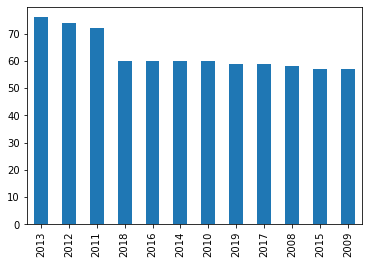

In [9]:
df.season.value_counts().plot(kind='bar')

# Top 10 Player of the match winners over the time

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64


<AxesSubplot:>

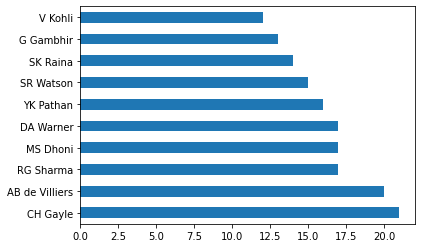

In [9]:
player_of_match=df['player_of_match'].value_counts()
print(player_of_match[:10])
player_of_match[:10].plot(kind='barh')

# Who won the most number of matches

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Daredevils                77
Rajasthan Royals                75
Rising Pune Supergiant          27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


<AxesSubplot:>

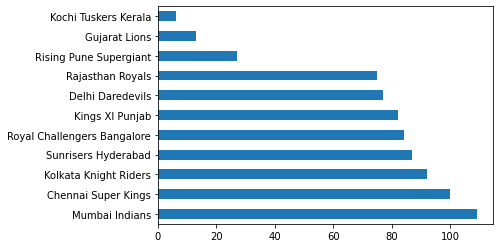

In [10]:
match_winner=df['winner'].value_counts()
print(match_winner)
match_winner.plot(kind='barh')

# Most matches won in particular season

Enter year:2019


<AxesSubplot:>

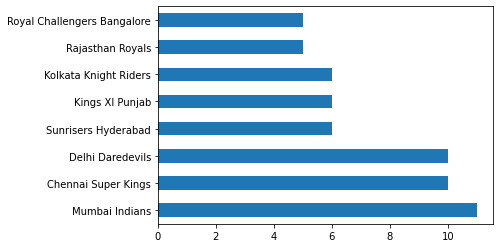

In [11]:
year=int(input("Enter year:"))
df.loc[df.season==year,"winner"].value_counts().plot(kind='barh')

# After winning the toss, what decision is taken bat or field

In [12]:
# toss_dec=df.toss_decision.value_counts()
# print(toss_dec)
# toss_dec.plot(kind="barh")
df.groupby('season')['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              24
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            32
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            49
        bat              10
Name: toss_decision, dtype: int64

# Which team won most number of matches with the margin of more than 50 runs

<AxesSubplot:>

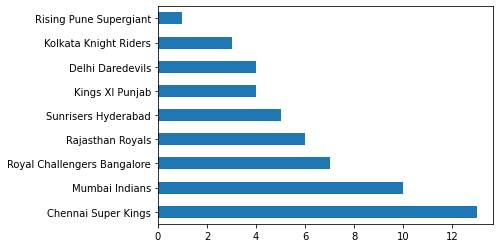

In [13]:
m_winner=df.loc[df['win_by_runs']>50,'winner'].value_counts()
m_winner.plot(kind='barh')

# Which team won most number of matches with the margin of more than 5 wickets

<AxesSubplot:>

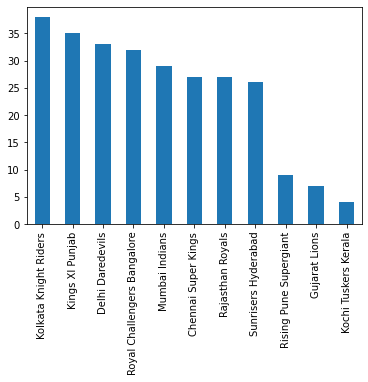

In [14]:
w=df.loc[df['win_by_wickets']>5,'winner'].value_counts()
w.plot(kind='bar')

# Toss winner won the match? which team did the best?

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Delhi Daredevils               42
Sunrisers Hyderabad            42
Rajasthan Royals               42
Royal Challengers Bangalore    41
Kings XI Punjab                35
Rising Pune Supergiant         11
Gujarat Lions                  10
Kochi Tuskers Kerala            4
Name: winner, dtype: int64


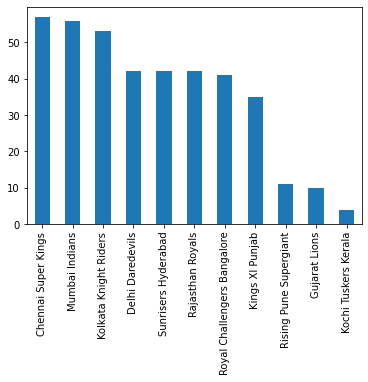

In [15]:
df.loc[df.toss_winner==df.winner,'winner'].value_counts().plot(kind='bar')
print(df.loc[df.toss_winner==df.winner,'winner'].value_counts())

# Team to team record

In [16]:
teams = df.team1.unique().tolist()
teams.sort()
for team1 in teams:
    for team2 in df.team2.unique().tolist():
        df_ttw = df.loc[(df["team1"] == team1) & (df["team2"] == team2), "winner"]
        if len(df_ttw) > 0:
            print(df_ttw.value_counts())

Chennai Super Kings            6
Royal Challengers Bangalore    4
Name: winner, dtype: int64
Chennai Super Kings       3
Rising Pune Supergiant    1
Name: winner, dtype: int64
Kolkata Knight Riders    7
Chennai Super Kings      5
Name: winner, dtype: int64
Chennai Super Kings    7
Kings XI Punjab        4
Name: winner, dtype: int64
Chennai Super Kings    9
Delhi Daredevils       4
Name: winner, dtype: int64
Chennai Super Kings    8
Sunrisers Hyderabad    5
Name: winner, dtype: int64
Mumbai Indians         7
Chennai Super Kings    5
Name: winner, dtype: int64
Chennai Super Kings    7
Rajasthan Royals       5
Name: winner, dtype: int64
Kochi Tuskers Kerala    1
Chennai Super Kings     1
Name: winner, dtype: int64
Royal Challengers Bangalore    8
Delhi Daredevils               4
Name: winner, dtype: int64
Delhi Daredevils          3
Rising Pune Supergiant    2
Name: winner, dtype: int64
Kolkata Knight Riders    7
Delhi Daredevils         3
Name: winner, dtype: int64
Kings XI Punjab     9


In [17]:
df.groupby('toss_decision')['winner'].value_counts()

toss_decision  winner                     
bat            Chennai Super Kings            52
               Mumbai Indians                 45
               Kolkata Knight Riders          35
               Sunrisers Hyderabad            35
               Rajasthan Royals               34
               Delhi Daredevils               31
               Royal Challengers Bangalore    26
               Kings XI Punjab                21
               Rising Pune Supergiant         11
               Gujarat Lions                   2
field          Mumbai Indians                 64
               Kings XI Punjab                61
               Royal Challengers Bangalore    58
               Kolkata Knight Riders          57
               Sunrisers Hyderabad            52
               Chennai Super Kings            48
               Delhi Daredevils               46
               Rajasthan Royals               41
               Rising Pune Supergiant         16
               Gujarat Lio

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64


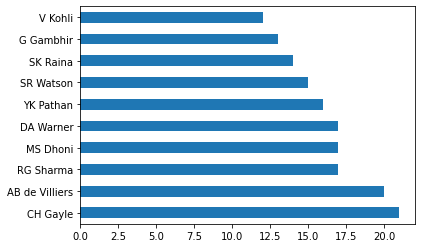

In [22]:
df['player_of_match'].value_counts()[:10].plot(kind='barh')
print(df['player_of_match'].value_counts()[:10])

In [43]:
years=[2008,2009,2010,2011,2012,2013,2014,1015,2016,2017,2018,2019]
for year in years:
    print("-------------------------------")
    print(f"-----Year-{year}-----")
    print(df.loc[df.season==year,'winner'].value_counts())

-------------------------------
-----Year-2008-----
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Sunrisers Hyderabad             2
Name: winner, dtype: int64
-------------------------------
-----Year-2009-----
Delhi Daredevils               10
Sunrisers Hyderabad             9
Royal Challengers Bangalore     9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
-------------------------------
-----Year-2010-----
Mumbai Indians                 11
Chennai Super Kings             9
Sunrisers Hyderabad             8
Royal Challengers Bangalore     8
Kolkata Knight Riders           7
Delhi Daredevils                7
Rajasthan Royals                6
Kings XI